## Problem Statement: 
**Problem Statement:**
Predictive Modeling for Human Development Index (HDI) of Indian States and Union Territories.

**Description:**
Develop a machine learning model to predict the Human Development Index (HDI) of Indian states and union territories based on various socio-economic indicators such as health index, educational index, income index, life expectancy, expected years of schooling, mean years of schooling, and gross national income per capita.

**Dataset:**
The dataset contains socio-economic indicators for each Indian state and union territory, including:
- Subnational HDI
- Health index
- Educational index
- Income index
- Life expectancy
- Expected years of schooling
- Mean years of schooling
- Log Gross National Income per capita

**Objective:**
Build a regression model to accurately predict the HDI of Indian states and union territories based on the provided socio-economic indicators. Evaluate the model's performance using appropriate metrics such as mean absolute error, mean squared error, and R-squared score.

**Tasks:**
1. Data Exploration: Analyze the dataset to understand the distribution and relationships between variables.
2. Data Preprocessing: Handle missing values, scale numerical features, and encode categorical variables if present.
3. Model Selection: Experiment with various regression algorithms such as Linear regression, KNN Regressor, Decision Tree regression, Dandom Forest regression, and Support Vector regression.
4. Model Evaluation: Evaluate the performance of each model using cross-validation, GridSearchCV and appropriate evaluation metrics.
5. Hyperparameter Tuning: Fine-tune the hyperparameters of the best-performing model using techniques like grid search or random search.
6. Feature Selection: Identify the most relevant features for predicting HDI using statistical tests or feature importance techniques.(Random Forest has been used.)


**Expected Outcome:**
A robust predictive model that accurately predicts the Human Development Index of Indian states and union territories, providing valuable insights for policymakers and stakeholders to prioritize socio-economic development initiatives.

**~Siddharth R Bhardwaj**<br>
**Register No: 22112028**

In [1]:
## Importing the required Libraries...
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config
set_config(display='diagram')
from sklearn.model_selection import GridSearchCV

In [2]:
# Define the URL of the Wikipedia page to scrape
url = 'https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_Human_Development_Index'

In [3]:
# Send an HTTP request to the URL and get the HTML content of the page
response = requests.get(url)
html_content = response.text

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.text, 'html')
soup.find('table')

<table class="sidebar nomobile nowraplinks"><tbody><tr><th class="sidebar-title"><a href="/wiki/States_and_union_territories_of_India" title="States and union territories of India">States and union <br/> territories of India</a> <br/> ordered by</th></tr><tr><td class="sidebar-image"><figure class="mw-halign-center" typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Flag_of_India.svg"><img class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="47" src="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/70px-Flag_of_India.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/105px-Flag_of_India.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/140px-Flag_of_India.svg.png 2x" width="70"/></a><figcaption></figcaption></figure></td></tr><tr><td class="sidebar-content hlist">
<ul><li><a href="/wiki/List_of_states_and_union_territories_of_India_by_area" title="List of s

In [4]:
# Find the table within the HTML content using BeautifulSoup
soup.find_all('table')[6]

<table class="wikitable sortable">
<caption>Custom set of indicators (2021)<sup class="reference" id="cite_ref-21"><a href="#cite_note-21">[21]</a></sup>
</caption>
<tbody><tr>
<th>
</th>
<th>Subnational HDI
</th>
<th>Health index
</th>
<th>Educational index
</th>
<th>Income index
</th>
<th>Life expectancy
</th>
<th>Life expectancy females
</th>
<th>Life expectancy males
</th>
<th>Expected years schooling
</th>
<th>Expected years schooling girls
</th>
<th>Expected years schooling boys
</th>
<th>Mean years schooling
</th>
<th>Mean years schooling females
</th>
<th>Mean years schooling males
</th>
<th>Log Gross National Income per capita
</th>
<th>Log Gross National Income per capita females
</th>
<th>Log Gross National Income per capita males
</th></tr>
<tr>
<td>Total
</td>
<td>0.633
</td>
<td>0.727
</td>
<td>0.552
</td>
<td>0.633
</td>
<td>67.24
</td>
<td>68.89
</td>
<td>65.76
</td>
<td>11.88
</td>
<td>11.94
</td>
<td>11.81
</td>
<td>6.655
</td>
<td>6.252
</td>
<td>7.229
</td>
<td>8.79

In [5]:
## Looking at the above result and mentioning the "class"
soup.find('table', class_='wikitable sortable')

# Find the 7th table on the page (index 6)
table = soup.find_all('table')[6]

In [6]:
# Finding all the table header elements (th) within the table
states_titles = table.find_all('th')
states_titles


[<th>
 </th>,
 <th>Subnational HDI
 </th>,
 <th>Health index
 </th>,
 <th>Educational index
 </th>,
 <th>Income index
 </th>,
 <th>Life expectancy
 </th>,
 <th>Life expectancy females
 </th>,
 <th>Life expectancy males
 </th>,
 <th>Expected years schooling
 </th>,
 <th>Expected years schooling girls
 </th>,
 <th>Expected years schooling boys
 </th>,
 <th>Mean years schooling
 </th>,
 <th>Mean years schooling females
 </th>,
 <th>Mean years schooling males
 </th>,
 <th>Log Gross National Income per capita
 </th>,
 <th>Log Gross National Income per capita females
 </th>,
 <th>Log Gross National Income per capita males
 </th>]

In [7]:
# Extracting the text from each table header element and strip any leading or trailing whitespace
states_table_titles = [title.text.strip() for title in states_titles]
print(states_table_titles)

['', 'Subnational HDI', 'Health index', 'Educational index', 'Income index', 'Life expectancy', 'Life expectancy females', 'Life expectancy males', 'Expected years schooling', 'Expected years schooling girls', 'Expected years schooling boys', 'Mean years schooling', 'Mean years schooling females', 'Mean years schooling males', 'Log Gross National Income per capita', 'Log Gross National Income per capita females', 'Log Gross National Income per capita males']


In [8]:
# Creating an empty DataFrame with column names extracted from the table titles
import pandas as pd
df = pd.DataFrame(columns = states_table_titles)
df

,,Subnational HDI,Health index,Educational index,Income index,Life expectancy,Life expectancy females,Life expectancy males,Expected years schooling,Expected years schooling girls,Expected years schooling boys,Mean years schooling,Mean years schooling females,Mean years schooling males,Log Gross National Income per capita,Log Gross National Income per capita females,Log Gross National Income per capita males


In [9]:
soup = BeautifulSoup(html_content, 'html.parser')
tables = soup.find_all('table')



In [10]:
# Assigning the 7th table to the variable table_16 and reading the HTML table into a DataFrame using pandas read_html function,
# and then selecting the first table (index 0) from the list of tables returned.
if len(tables) >= 7:
    table_16 = tables[6]
    df = pd.read_html(str(table_16))[0]  # Adjusted index to 0 to get the first table
    print(df)
else:
    print("Error: There are fewer than 7 tables on the page.") 
 # If there are fewer than 7 tables, print an error message

                     Unnamed: 0  Subnational HDI  Health index  \
0                         Total            0.633         0.727   
1   Andaman and Nicobar Islands            0.706         0.820   
2                Andhra Pradesh            0.630         0.734   
3             Arunachal Pradesh            0.665         0.767   
4                         Assam            0.597         0.714   
5                         Bihar            0.571         0.712   
6                    Chandigarh            0.744         0.780   
7                  Chhattisgarh            0.605         0.689   
8        Dadra and Nagar Haveli            0.620         0.766   
9                 Daman and Diu            0.661         0.772   
10                          Goa            0.751         0.809   
11                      Gujarat            0.638         0.745   
12                      Haryana            0.691         0.756   
13             Himachal Pradesh            0.703         0.757   
14        

In [11]:
df

,Unnamed: 0,Subnational HDI,Health index,Educational index,Income index,Life expectancy,Life expectancy females,Life expectancy males,Expected years schooling,Expected years schooling girls,Expected years schooling boys,Mean years schooling,Mean years schooling females,Mean years schooling males,Log Gross National Income per capita,Log Gross National Income per capita females,Log Gross National Income per capita males
0,Total,0.633,0.727,0.552,0.633,67.24,68.89,65.76,11.88,11.94,11.810,6.655,6.252,7.229,8.793,7.731,9.272
1,Andaman and Nicobar Islands,0.706,0.820,0.607,0.706,73.31,76.22,71.50,12.38,12.78,11.980,7.900,8.424,7.712,9.278,8.157,9.783
2,Andhra Pradesh,0.630,0.734,0.517,0.660,67.69,69.44,66.19,11.95,12.04,11.870,5.546,5.135,6.120,8.973,7.888,9.461
3,Arunachal Pradesh,0.665,0.767,0.575,0.665,69.87,72.08,68.27,13.20,13.32,13.110,6.257,6.118,6.556,9.010,7.921,9.500
4,Assam,0.597,0.714,0.530,0.564,66.38,67.83,64.92,11.35,11.70,11.040,6.446,6.616,6.499,8.336,7.329,8.790
5,Bihar,0.571,0.712,0.480,0.544,66.30,67.73,64.84,11.48,11.36,11.730,4.845,3.775,6.026,8.204,7.212,8.650
6,Chandigarh,0.744,0.780,0.704,0.751,70.71,73.11,69.07,12.95,13.19,12.770,10.320,11.160,9.957,9.575,8.418,10.100
7,Chhattisgarh,0.605,0.689,0.528,0.609,64.76,65.83,63.33,11.85,12.30,11.420,5.975,5.293,6.727,8.635,7.592,9.105
8,Dadra and Nagar Haveli,0.620,0.766,0.507,0.613,69.76,71.95,68.17,10.39,10.94,9.974,6.550,5.620,7.229,8.665,7.618,9.137
9,Daman and Diu,0.661,0.772,0.554,0.675,70.21,72.49,68.59,10.60,11.05,10.210,7.785,7.538,8.100,9.070,7.974,9.564


In [12]:
## Saving the dataset into a csv file so it stays saved for future use.
df.to_csv("wiki.csv")

## --- Loading the Dataset ----

In [13]:
df = pd.read_csv("wiki.csv")

In [14]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Subnational HDI,Health index,Educational index,Income index,Life expectancy,Life expectancy females,Life expectancy males,Expected years schooling,Expected years schooling girls,Expected years schooling boys,Mean years schooling,Mean years schooling females,Mean years schooling males,Log Gross National Income per capita,Log Gross National Income per capita females,Log Gross National Income per capita males
0,0,Total,0.633,0.727,0.552,0.633,67.24,68.89,65.76,11.88,11.94,11.81,6.655,6.252,7.229,8.793,7.731,9.272
1,1,Andaman and Nicobar Islands,0.706,0.820,0.607,0.706,73.31,76.22,71.50,12.38,12.78,11.98,7.900,8.424,7.712,9.278,8.157,9.783
2,2,Andhra Pradesh,0.630,0.734,0.517,0.660,67.69,69.44,66.19,11.95,12.04,11.87,5.546,5.135,6.120,8.973,7.888,9.461
3,3,Arunachal Pradesh,0.665,0.767,0.575,0.665,69.87,72.08,68.27,13.20,13.32,13.11,6.257,6.118,6.556,9.010,7.921,9.500
4,4,Assam,0.597,0.714,0.530,0.564,66.38,67.83,64.92,11.35,11.70,11.04,6.446,6.616,6.499,8.336,7.329,8.790


In [15]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Subnational HDI,Health index,Educational index,Income index,Life expectancy,Life expectancy females,Life expectancy males,Expected years schooling,Expected years schooling girls,Expected years schooling boys,Mean years schooling,Mean years schooling females,Mean years schooling males,Log Gross National Income per capita,Log Gross National Income per capita females,Log Gross National Income per capita males
32,32,Telangana,0.647,0.748,0.542,0.667,68.59,70.53,67.06,12.47,12.65,12.30,5.870,5.208,6.698,9.022,7.932,9.513
33,33,Tripura,0.629,0.773,0.549,0.586,70.25,72.54,68.63,11.84,11.69,12.08,6.603,6.701,6.746,8.486,7.461,8.948
34,34,Uttar Pradesh,0.592,0.667,0.524,0.591,63.39,64.12,61.96,11.22,11.11,11.34,6.383,5.535,7.314,8.519,7.490,8.983
35,35,Uttarakhand,0.672,0.733,0.609,0.678,67.66,69.40,66.16,12.50,12.85,12.16,7.869,7.478,8.498,9.093,7.994,9.588
36,36,West Bengal,0.624,0.761,0.534,0.598,69.48,71.61,67.90,11.77,12.27,11.30,6.226,6.179,6.480,8.567,7.532,9.033


In [16]:
## Looking for the missing values
df.isna().sum()

Unnamed: 0.1                                    0
Unnamed: 0                                      0
Subnational HDI                                 0
Health index                                    0
Educational index                               0
Income index                                    0
Life expectancy                                 0
Life expectancy females                         0
Life expectancy males                           0
Expected years schooling                        0
Expected years schooling girls                  0
Expected years schooling boys                   0
Mean years schooling                            0
Mean years schooling females                    0
Mean years schooling males                      0
Log Gross National Income per capita            0
Log Gross National Income per capita females    0
Log Gross National Income per capita males      0
dtype: int64

In [17]:
## Dropping the redundant Columns

In [18]:
df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis = 1, inplace = True)

In [19]:
df.head(2)

,Subnational HDI,Health index,Educational index,Income index,Life expectancy,Life expectancy females,Life expectancy males,Expected years schooling,Expected years schooling girls,Expected years schooling boys,Mean years schooling,Mean years schooling females,Mean years schooling males,Log Gross National Income per capita,Log Gross National Income per capita females,Log Gross National Income per capita males
0,0.633,0.727,0.552,0.633,67.24,68.89,65.76,11.88,11.94,11.81,6.655,6.252,7.229,8.793,7.731,9.272
1,0.706,0.820,0.607,0.706,73.31,76.22,71.50,12.38,12.78,11.98,7.900,8.424,7.712,9.278,8.157,9.783


In [20]:
### As we can see there are no missing values in the dataset, we can proceed with the next step.

In [21]:
y = df["Subnational HDI"]
y.head(4)

0    0.633
1    0.706
2    0.630
3    0.665
Name: Subnational HDI, dtype: float64

## Scaling

##### Standardization was likely chosen for your dataset because it ensures consistent scales across features, aiding algorithms like SVM and KNN. It mitigates the influence of outliers and maintains interpretability. Standardized features facilitate model convergence, improving performance, especially in algorithms sensitive to feature scales.

In [22]:
from sklearn.preprocessing import StandardScaler

### Checking the distributions beforehand to confirm, that standardisation is the best method of Scaling.

Text(0.5, 1.0, 'Life expectancy')

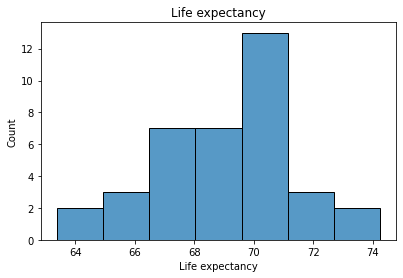

In [23]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(df['Life expectancy'])
plt.title('Life expectancy')

Text(0.5, 1.0, 'Expected years schooling')

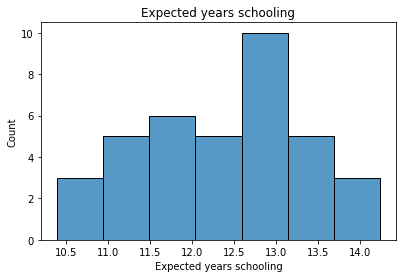

In [24]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(df['Expected years schooling'])
plt.title('Expected years schooling')

Text(0.5, 1.0, 'Mean years schooling')

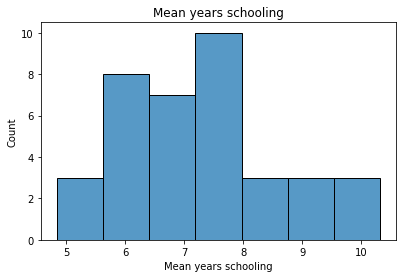

In [25]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(df['Mean years schooling'])
plt.title('Mean years schooling')

Text(0.5, 1.0, 'Log Gross National Income per capita')

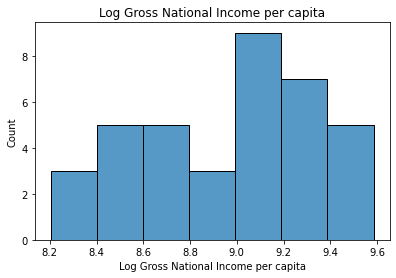

In [26]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(df['Log Gross National Income per capita'])
plt.title('Log Gross National Income per capita')

Text(0.5, 1.0, 'Health index')

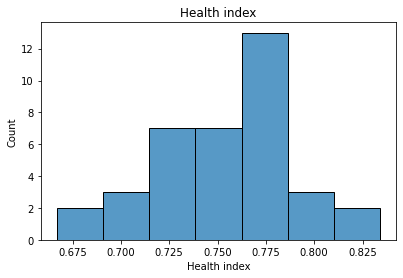

In [27]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(df['Health index'])
plt.title('Health index')

Text(0.5, 1.0, 'Educational index')

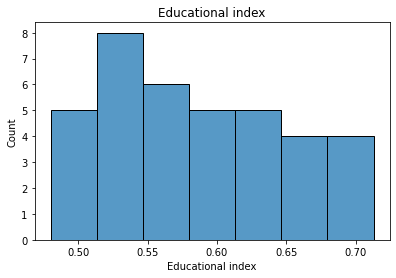

In [28]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(df['Educational index'])
plt.title('Educational index')

Text(0.5, 1.0, 'Income index')

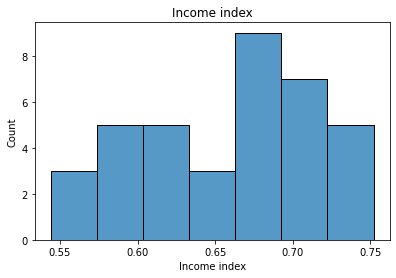

In [29]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(df['Income index'])
plt.title('Income index')

#### Checking for the outliers, if there are any datapoints outside the boxes, but they all fall inside the boxes

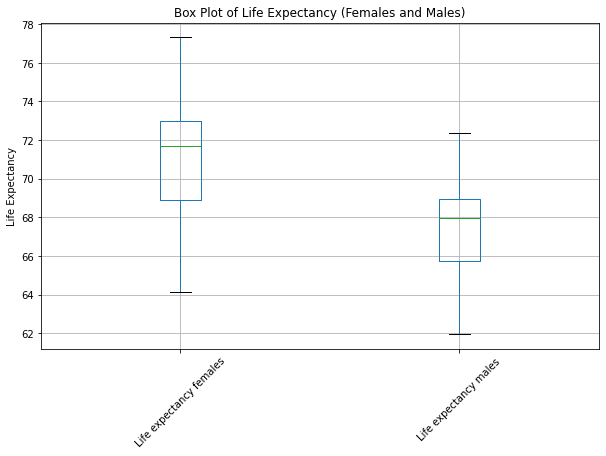

In [30]:
import matplotlib.pyplot as plt

# Select the columns of interest
columns_of_interest = ['Life expectancy females', 'Life expectancy males']

# Create a box plot for each column
plt.figure(figsize=(10, 6))
df[columns_of_interest].boxplot()
plt.title('Box Plot of Life Expectancy (Females and Males)')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Life expectancy females')

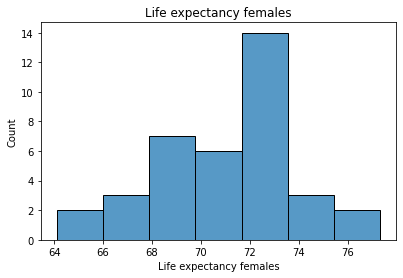

In [31]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(df['Life expectancy females'])
plt.title('Life expectancy females')

Text(0.5, 1.0, 'Life expectancy males')

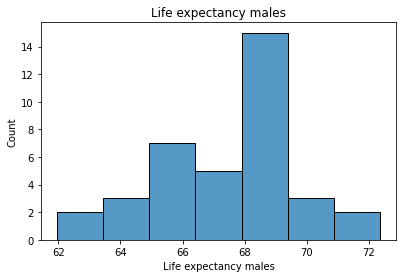

In [32]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(df['Life expectancy males'])
plt.title('Life expectancy males')

In [33]:
from sklearn.preprocessing import StandardScaler

# Define the columns for StandardScaler
continuous_cols = ['Life expectancy', 'Life expectancy females', 'Life expectancy males',
                   'Expected years schooling', 'Expected years schooling girls', 'Expected years schooling boys',
                   'Mean years schooling', 'Mean years schooling females', 'Mean years schooling males',
                   'Log Gross National Income per capita', 'Log Gross National Income per capita females',
                   'Log Gross National Income per capita males']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to continuous numerical features
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])


In [34]:
df.head()

,Subnational HDI,Health index,Educational index,Income index,Life expectancy,Life expectancy females,Life expectancy males,Expected years schooling,Expected years schooling girls,Expected years schooling boys,Mean years schooling,Mean years schooling females,Mean years schooling males,Log Gross National Income per capita,Log Gross National Income per capita females,Log Gross National Income per capita males
0,0.633,0.727,0.552,0.633,-0.796963,-0.791650,-0.788925,-0.511052,-0.643727,-0.356537,-0.498189,-0.539697,-0.380575,-0.464284,-0.462957,-0.463218
1,0.706,0.820,0.607,0.706,1.791092,1.777802,1.768728,0.018313,0.152098,-0.164433,0.438852,0.635766,0.082284,0.839561,0.840101,0.838902
2,0.630,0.734,0.517,0.660,-0.605097,-0.598854,-0.597324,-0.436941,-0.548986,-0.288736,-1.332871,-1.144206,-1.443330,0.019618,0.017278,0.018388
3,0.665,0.767,0.575,0.665,0.324386,0.326570,0.329491,0.886472,0.663700,1.112492,-0.797741,-0.612217,-1.025511,0.119086,0.118219,0.117767
4,0.597,0.714,0.530,0.564,-1.163640,-1.163222,-1.163215,-1.072179,-0.871106,-1.226654,-0.655492,-0.342705,-1.080134,-1.692855,-1.692603,-1.691441


## Splitting and Model Training 

In [35]:
X = df.drop("Subnational HDI", axis = 1)
X.head(2)

,Health index,Educational index,Income index,Life expectancy,Life expectancy females,Life expectancy males,Expected years schooling,Expected years schooling girls,Expected years schooling boys,Mean years schooling,Mean years schooling females,Mean years schooling males,Log Gross National Income per capita,Log Gross National Income per capita females,Log Gross National Income per capita males
0,0.727,0.552,0.633,-0.796963,-0.791650,-0.788925,-0.511052,-0.643727,-0.356537,-0.498189,-0.539697,-0.380575,-0.464284,-0.462957,-0.463218
1,0.820,0.607,0.706,1.791092,1.777802,1.768728,0.018313,0.152098,-0.164433,0.438852,0.635766,0.082284,0.839561,0.840101,0.838902


In [36]:
y.head()

0    0.633
1    0.706
2    0.630
3    0.665
4    0.597
Name: Subnational HDI, dtype: float64

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Linear Regression

In [38]:
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model.fit(X_train, y_train)

/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [39]:
y_pred = model.predict(X_test)

print('MAE : ', mean_absolute_error(y_test,y_pred))
print('MSE : ', mean_squared_error(y_test,y_pred))
print('R2 Score : ', r2_score(y_test,y_pred))

MAE :  0.0006594361862145385
MSE :  6.645191969534528e-07
R2 Score :  0.9997864136021881


## Cross Validation

In [40]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated

array([0.99707241, 0.99964995, 0.9984072 , 0.99395801, 0.99960314])

In [41]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated

0.9977381406299909

## GridSeachCV

In [42]:
# Define the parameter grid
param_grid = {
    "fit_intercept": [True, False],
    "normalize": [True, False],
    "copy_X": [True, False],
    "n_jobs": [None, -1]  # Number of CPU cores to use during the computation. None means 1 and -1 means using all processors.
}

# Initialize the linear regression model
model = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)

/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Best R^2 Score: 0.9977381406299909


/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated

## Result for the Cross-Validation
##### --> Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
##### --> Best R^2 Score: 0.9977381406299909

## KNN Regressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [44]:
X.head()

,Health index,Educational index,Income index,Life expectancy,Life expectancy females,Life expectancy males,Expected years schooling,Expected years schooling girls,Expected years schooling boys,Mean years schooling,Mean years schooling females,Mean years schooling males,Log Gross National Income per capita,Log Gross National Income per capita females,Log Gross National Income per capita males
0,0.727,0.552,0.633,-0.796963,-0.791650,-0.788925,-0.511052,-0.643727,-0.356537,-0.498189,-0.539697,-0.380575,-0.464284,-0.462957,-0.463218
1,0.820,0.607,0.706,1.791092,1.777802,1.768728,0.018313,0.152098,-0.164433,0.438852,0.635766,0.082284,0.839561,0.840101,0.838902
2,0.734,0.517,0.660,-0.605097,-0.598854,-0.597324,-0.436941,-0.548986,-0.288736,-1.332871,-1.144206,-1.443330,0.019618,0.017278,0.018388
3,0.767,0.575,0.665,0.324386,0.326570,0.329491,0.886472,0.663700,1.112492,-0.797741,-0.612217,-1.025511,0.119086,0.118219,0.117767
4,0.714,0.530,0.564,-1.163640,-1.163222,-1.163215,-1.072179,-0.871106,-1.226654,-0.655492,-0.342705,-1.080134,-1.692855,-1.692603,-1.691441


In [45]:
y.head()

0    0.633
1    0.706
2    0.630
3    0.665
4    0.597
Name: Subnational HDI, dtype: float64

In [46]:
# knn = KNeighborsRegressor(n_neighbors=3)
# Initialize the KNN regressor with the best hyperparameters
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric = 'minkowski')

# Train the model on the entire dataset
knn.fit(X, y)


KNeighborsRegressor(weights='distance')

In [47]:
y_pred = knn.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.0
R^2 Score: 1.0


In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize an empty list to store MSE scores
mse_scores = []

# Loop through different values of k
for k in range(1, 20):
    # Initialize KNN regressor with k neighbors
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the model on the training data
    knn_regressor.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = knn_regressor.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Append the MSE score to the list
    mse_scores.append(mse)

# Find the best value of k with the lowest MSE
best_k = mse_scores.index(min(mse_scores)) + 1
best_mse = min(mse_scores)

print("Best value of k:", best_k)
print("Lowest MSE:", best_mse)


Best value of k: 3
Lowest MSE: 0.00014388888888888942


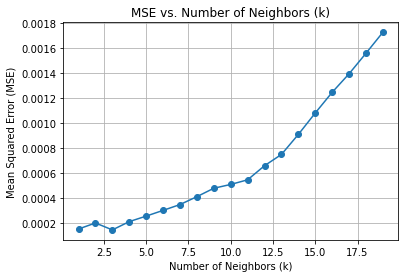

In [49]:
import matplotlib.pyplot as plt
# Plot the MSE scores against the values of k
plt.plot(range(1, 20), mse_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()
## Changing the value of k = 3

## Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train, y_train, cv=5, scoring='r2')

array([0.98257868, 0.88720638, 0.89878448, 0.79035762, 0.99212754])

In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train, y_train, cv=5, scoring='r2').mean()

0.9102109401922472

## GridSearchCV

In [52]:
param_grid = {
    "n_neighbors": [5,10,15,20,25,30],
    "weights": ['uniform','distance'],
    "metric":['minkowski','manahattan','euclidean']
}


from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_re

GridSearchCV(cv=5, estimator=KNeighborsRegressor(weights='distance'),
             param_grid={'metric': ['minkowski', 'manahattan', 'euclidean'],
                         'n_neighbors': [5, 10, 15, 20, 25, 30],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [53]:
grid.best_score_

0.9102109401922472

In [54]:
grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

## Decision Tree

In [118]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
modeld = DecisionTreeRegressor(max_depth=10, criterion = 'absolute_error')

In [124]:
modeld.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=10)

In [125]:
# Assuming you have trained the model and have new data X_test for prediction

# Make predictions on the test data
y_pred = modeld.predict(X_test)


In [126]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 0.015749999999999997
Mean Squared Error (MSE): 0.0004212499999999999
R^2 Score: 0.8646039565286294


## Cross-Validation

In [127]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(modeld, X_train, y_train, cv=5, scoring='r2')

array([0.78390795, 0.71610676, 0.5513093 , 0.85564608, 0.78061252])

In [128]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(modeld, X_train, y_train, cv=5, scoring='r2').mean()

0.7537497611859567

In [129]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'max_depth': [2,4,6,8,10,12],# Maximum depth of the tree
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}
grid = GridSearchCV(modeld, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)
# Get the best hyperparameters and the best MSE score
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'squared_error', 'max_depth': 4}
0.755266119462917


### Results
##### --> Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 4}
##### --> Best Mean Squared Error:0.755266119462917


## Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rfr =  RandomForestRegressor(oob_score=True, max_depth = 8, criterion = "absolute_error")

In [65]:
rfr.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=8, oob_score=True)

In [66]:
y_pred = rfr.predict(X_test)

In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 0.01079666666666663
Mean Squared Error (MSE): 0.0001567082499999999
R^2 Score: 0.9496316272300952


In [68]:
print("The oob score is: ", rfr.oob_score_)

The oob score is:  0.8854104016989504


## Cross-Validation

In [69]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(rfr, X_train, y_train, cv=5, scoring='r2')

array([0.97222674, 0.84535981, 0.86317557, 0.81560636, 0.9320805 ])

In [70]:
from sklearn.model_selection import cross_val_score
print("The mean cross validation score is: ", cross_val_score(rfr, X_train, y_train, cv=5, scoring='r2').mean())


The mean cross validation score is:  0.9007516340608875


## GridSearchCV

In [71]:
params_grid = {
    "criterion" : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [2,4,6,8,10,12]}


In [72]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rfr, 
                       param_grid = params_grid, 
                       cv = 5)

In [73]:
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='absolute_error',
                                             max_depth=8, oob_score=True),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [2, 4, 6, 8, 10, 12]})

In [74]:
rf_grid.best_params_

{'criterion': 'absolute_error', 'max_depth': 12}

In [75]:
rf_grid.best_score_

0.8994339731856098

## FEATURE SELECTION USING RANDOM FOREST (Important Feature)

In [76]:
imp = rfr.feature_importances_

In [77]:
imp

array([0.03427649, 0.35426624, 0.04080619, 0.03457072, 0.04925842,
       0.04181693, 0.02839054, 0.05822956, 0.02051933, 0.08863148,
       0.05270288, 0.0602689 , 0.04531732, 0.03668215, 0.05426284])

In [78]:
imp.max()

0.35426623938818

In [79]:
## This code lists out tha top 7 importance values of the features pressent in the dataset.
max_7_features = np.argsort(imp)[-7:]

# Get the maximum 5 values
max_7_values = imp[max_7_features]

print("Top 7 maximum values:")
for value in max_7_values:
    print(value)

Top 7 maximum values:
0.04925842107752124
0.05270288346013007
0.054262839975781664
0.05822955596039054
0.060268904883991635
0.08863148392037379
0.35426623938818


In [80]:
## This code gives us the information about the feature number along with it's feature importance
max_7_features = np.argsort(imp)[-7:]

print("Top 7 maximum feature importances:")
for feature_index in max_7_features:
    print(f"Feature's Index in the dataset: {feature_index}, Importance: {imp[feature_index]}")


Top 7 maximum feature importances:
Feature's Index in the dataset: 4, Importance: 0.04925842107752124
Feature's Index in the dataset: 10, Importance: 0.05270288346013007
Feature's Index in the dataset: 14, Importance: 0.054262839975781664
Feature's Index in the dataset: 7, Importance: 0.05822955596039054
Feature's Index in the dataset: 11, Importance: 0.060268904883991635
Feature's Index in the dataset: 9, Importance: 0.08863148392037379
Feature's Index in the dataset: 1, Importance: 0.35426623938818


## Support Vector Regressor

In [81]:
from sklearn.svm import SVR


In [82]:
model = SVR()

In [83]:
model.fit(X_train, y_train)

SVR()

In [84]:
y_pred = model.predict(X_test)

In [85]:
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('R2 Score',r2_score(y_test,y_pred))

MAE 0.04791666666666667
MSE 0.0031265833333333336
R2 Score -0.004930594461395543


## CROSS VALIDATION

In [86]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

array([-0.24105546, -0.01207552, -0.57201156, -0.61038613, -0.24672057])

In [87]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
print("The Cross Validation Score is : ", cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean())

The Cross Validation Score is :  -0.33644984819779516


## GridSearchCV

In [88]:
param_grid = {
    "kernel": ['linear','poly','rbf','sigmoid'],
    "degree": [0,1,2,3,4],
    "gamma":['scale','auto'],
    "max_iter":[-1,1,2,3]
}

In [89]:
from sklearn.model_selection import GridSearchCV

svr_grid = GridSearchCV(model, 
                        param_grid, 
                       cv = 5)
svr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'degree': [0, 1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [-1, 1, 2, 3]})

In [90]:
svr_grid.best_params_

{'degree': 0, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1}

In [91]:
svr_grid.best_score_

-0.33644984819779516

# Result:

## The END.....